## Importing modules

In [227]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input

## Loading Data and Preprocessing

In [228]:
# Loading the data
from sklearn.datasets import load_digits
from tensorflow.keras.utils import to_categorical
digits = load_digits()
images = digits.images
targets = digits.target
targets_categorical = to_categorical(targets, num_classes=10)

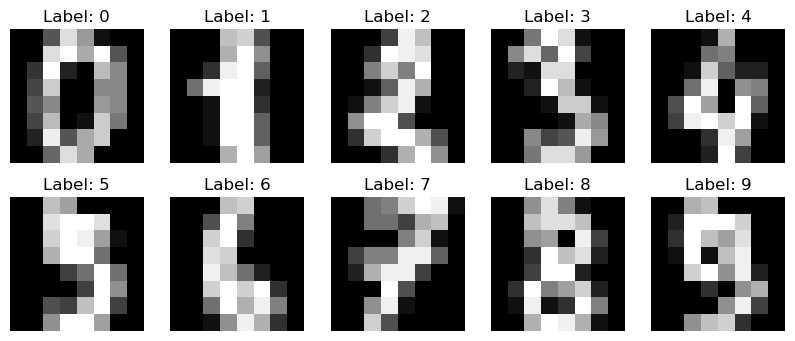

In [229]:
# Visualising our data
plt.figure(figsize=(10, 4))

# Display the first 10 images along with their target labels
for i in range(10):
    plt.subplot(2, 5, i + 1)  # 2 rows, 5 columns
    plt.imshow(images[i], cmap='gray')
    plt.title(f"Label: {targets[i]}")
    plt.axis('off')


In [230]:
# Preprocessing

# Normalizing the images
images = images / 16.0

# Adding dimension to images
images = np.expand_dims(images, axis=-1)  


In [231]:
from sklearn.model_selection import train_test_split
# Splitting our data
X_train, X_test, y_train, y_test = train_test_split(images, targets_categorical, test_size=0.2, random_state=42)


## Creating a CNN model

In [232]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(8, 8, 1)))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [233]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 6, 6, 32)          320       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 3, 3, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 1, 1, 64)          18496     
                                                                 
 flatten_19 (Flatten)        (None, 64)                0         
                                                                 
 dense_30 (Dense)            (None, 10)                650       
                                                                 
Total params: 19,466
Trainable params: 19,466
Non-trainable params: 0
_________________________________________________

In [234]:
# Compile the model
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

## Train the model

In [235]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
45/45 [==============================] - 1s 7ms/step - loss: 2.0747 - accuracy: 0.4168 - val_loss: 1.7339 - val_accuracy: 0.6333
Epoch 2/10
45/45 [==============================] - 0s 4ms/step - loss: 1.2596 - accuracy: 0.8253 - val_loss: 0.8197 - val_accuracy: 0.8361
Epoch 3/10
45/45 [==============================] - 0s 3ms/step - loss: 0.5835 - accuracy: 0.9123 - val_loss: 0.4170 - val_accuracy: 0.9167
Epoch 4/10
45/45 [==============================] - 0s 4ms/step - loss: 0.3501 - accuracy: 0.9290 - val_loss: 0.3078 - val_accuracy: 0.9278
Epoch 5/10
45/45 [==============================] - 0s 4ms/step - loss: 0.2612 - accuracy: 0.9415 - val_loss: 0.2331 - val_accuracy: 0.9472
Epoch 6/10
45/45 [==============================] - 0s 4ms/step - loss: 0.2041 - accuracy: 0.9541 - val_loss: 0.2033 - val_accuracy: 0.9528
Epoch 7/10
45/45 [==============================] - 0s 4ms/step - loss: 0.1690 - accuracy: 0.9596 - val_loss: 0.1620 - val_accuracy: 0.9694
Epoch 8/10
45/45 [==

## Testing the model

In [239]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

12/12 [==============================] - 0s 2ms/step - loss: 0.1217 - accuracy: 0.9694
Test Loss: 0.12169692665338516
Test Accuracy: 0.9694444537162781
